### Load & Explore Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold


In [2]:
train_data = pd.read_csv("./data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("./data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
train_data.groupby(['Sex','Survived'])['Survived'].value_counts()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

### Preprocess Data

##### Feature Aggregation / Feature Generation

* SibSp	- Number of siblings / spouses aboard the Titanic	
* Parch	- Number of parents / children aboard the Titanic

`SibSp` and `Parch` can be combined to form a new feature `Family`

* Family - Number of siblings / spouses / parents / children aboard the Titanic


In [8]:
train_data["Family"] = train_data["SibSp"] + train_data["Parch"]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
test_data["Family"] = test_data["SibSp"] + test_data["Parch"]
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


#### Missing Values

##### Filling ojbects with missing values

Age: Passenger Age in Years

There are 177 objects missing age as a feature

We fill these values with mean of 29



In [10]:
train_data['Age'] = train_data['Age'].fillna(29)
test_data['Age'] = test_data['Age'].fillna(29)

Embarked - Port of Embarkation

We fill the missing values with most occured port S


In [11]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [12]:
test_data.loc[test_data["Fare"].isnull(), 'Fare'] = 7

In [13]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family           0
dtype: int64

In [14]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Family           0
dtype: int64

##### Binarization

Sex: Categorical data

Changing it to numerical data such that male is 0 and female is 1

Sex: Numerical Data with 0 & 1 as values

In [15]:
train_data.loc[train_data["Sex"] == "male", "Sex"] = 0
train_data.loc[train_data["Sex"] == "female", "Sex"] = 1
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [16]:
test_data.loc[test_data["Sex"] == "male", "Sex"] = 0
test_data.loc[test_data["Sex"] == "female", "Sex"] = 1
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2


Embarked: Port of Embarkation

Changing the values S, C, Q to 0, 1, 2 repectively

In [17]:
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0


In [18]:
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,2


### Feature Selection

On Exploring data the following features can be considered as important compared to others

Input Features

* Pclass - Ticket class
* Sex - Passenger sex
* Age - Passenger age
* Fare - Passenger fare
* Family - Number of siblings / spouses / parents / children aboard the Titanic
* Embarked - Port of Embarkation

Class Labels

* Survived - Passenger survived or not

In [19]:
input_features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "Family"]
X_train_data = train_data[input_features]
X_train_data.head()

,Pclass,Sex,Age,Embarked,Fare,Family
0,3,0,22.0,0,7.2500,1
1,1,1,38.0,1,71.2833,1
2,3,1,26.0,0,7.9250,0
3,1,1,35.0,0,53.1000,1
4,3,0,35.0,0,8.0500,0


In [20]:
label = ["Survived"]
y_train_data = train_data[label]
y_train_data.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [21]:
X_test_data = test_data[input_features]
X_test_data.head()

,Pclass,Sex,Age,Embarked,Fare,Family
0,3,0,34.5,2,7.8292,0
1,3,1,47.0,0,7.0000,1
2,2,0,62.0,2,9.6875,0
3,3,0,27.0,0,8.6625,0
4,3,1,22.0,0,12.2875,2


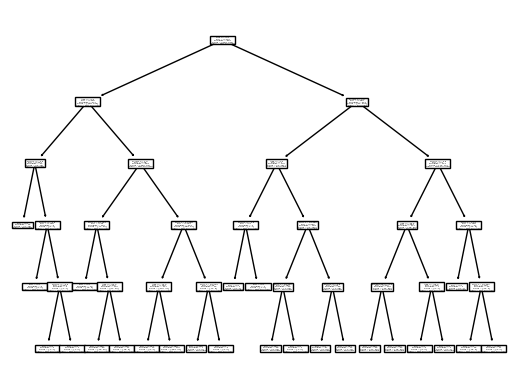

In [31]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=0)
dt_model.fit(X_train_data, y_train_data)

plot_tree(dt_model, feature_names=input_features, class_names=["Not Survived", "Survived"])
plt.savefig("./dtree.pdf")

In [32]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_dt = cross_val_score(dt_model, X_train_data, y_train_data, cv=k_fold)

# Calculate average classification accuracy
average_accuracy_dt = np.mean(cv_scores_dt)

# Print the results
print(f"Cross-Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Average Classification Accuracy (Decision Tree): {average_accuracy_dt:.2f}")

Cross-Validation Scores (Decision Tree): [0.79888268 0.80337079 0.86516854 0.79775281 0.83146067]
Average Classification Accuracy (Decision Tree): 0.82


In [43]:
dt_pred = dt_model.predict(X_test_data)

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_model.fit(X_train_data, y_train_data)

In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_train_data, y_train_data, cv=k_fold)

average_accuracy_rf = np.mean(cv_scores_rf)

print(f"Cross-Validation Scores (Random Forest): {cv_scores_rf}")
print(f"Average Classification Accuracy (Random Forest): {average_accuracy_rf:.2f}")

In [46]:
rf_pred = rf_model.predict(X_test_data)

In [47]:
dt_sub_df = pd.DataFrame()
dt_sub_df["PassengerID"] = test_data["PassengerId"]
dt_sub_df["Survived"] = dt_pred
dt_sub_df.to_csv("dt_submission.csv", index=False)

In [48]:
rf_sub_df = pd.DataFrame()
rf_sub_df["PassengerID"] = test_data["PassengerId"]
rf_sub_df["Survived"] = rf_pred
rf_sub_df.to_csv("rf_submisstion.csv", index=False)